# Ride Analysis

#### Dependencies and Data

In [2]:
# import dependencies
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# import and read csv files
ride_data_path = "resources/ride_data.csv"
city_data_path = "resources/city_data.csv"

ride_data_df = pd.read_csv(ride_data_path)
city_data_df = pd.read_csv(city_data_path)

In [4]:
# merge dataframes
rideshare_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
rideshare_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


### City analysis

In [5]:
# Create Urban Suburban and Rural City DataFrames.
urban_cities_df = rideshare_df[rideshare_df["type"] == "Urban"]
suburban_cities_df = rideshare_df[rideshare_df["type"] == "Suburban"]
rural_cities_df = rideshare_df[rideshare_df["type"] == "Rural"]


#### Fare by city and city type

In [6]:
# The total number of rides for each city type.
urban_ride_total = urban_cities_df.groupby(["city"]).count()["ride_id"].sort_values(ascending=False)
suburban_ride_total = suburban_cities_df.groupby(["city"]).count()["ride_id"].sort_values(ascending=False)
rural_ride_total = rural_cities_df.groupby(["city"]).count()["ride_id"].sort_values(ascending=False)

In [7]:
# The average fare for each city type.
urban_fare_mean = urban_cities_df.groupby(["city"]).mean()["fare"].sort_values(ascending=False)
suburban_fare_mean = suburban_cities_df.groupby(["city"]).mean()["fare"].sort_values(ascending=False)
rural_fare_mean = rural_cities_df.groupby(["city"]).mean()["fare"].sort_values(ascending=False)


In [8]:
# the average number of drivers for each city type.
urban_driver_mean = urban_cities_df.groupby(["city"]).mean()["driver_count"].sort_values(ascending=False)
suburban_driver_mean = suburban_cities_df.groupby(["city"]).mean()["driver_count"].sort_values(ascending=False)
rural_driver_mean = rural_cities_df.groupby(["city"]).mean()["driver_count"].sort_values(ascending=False)


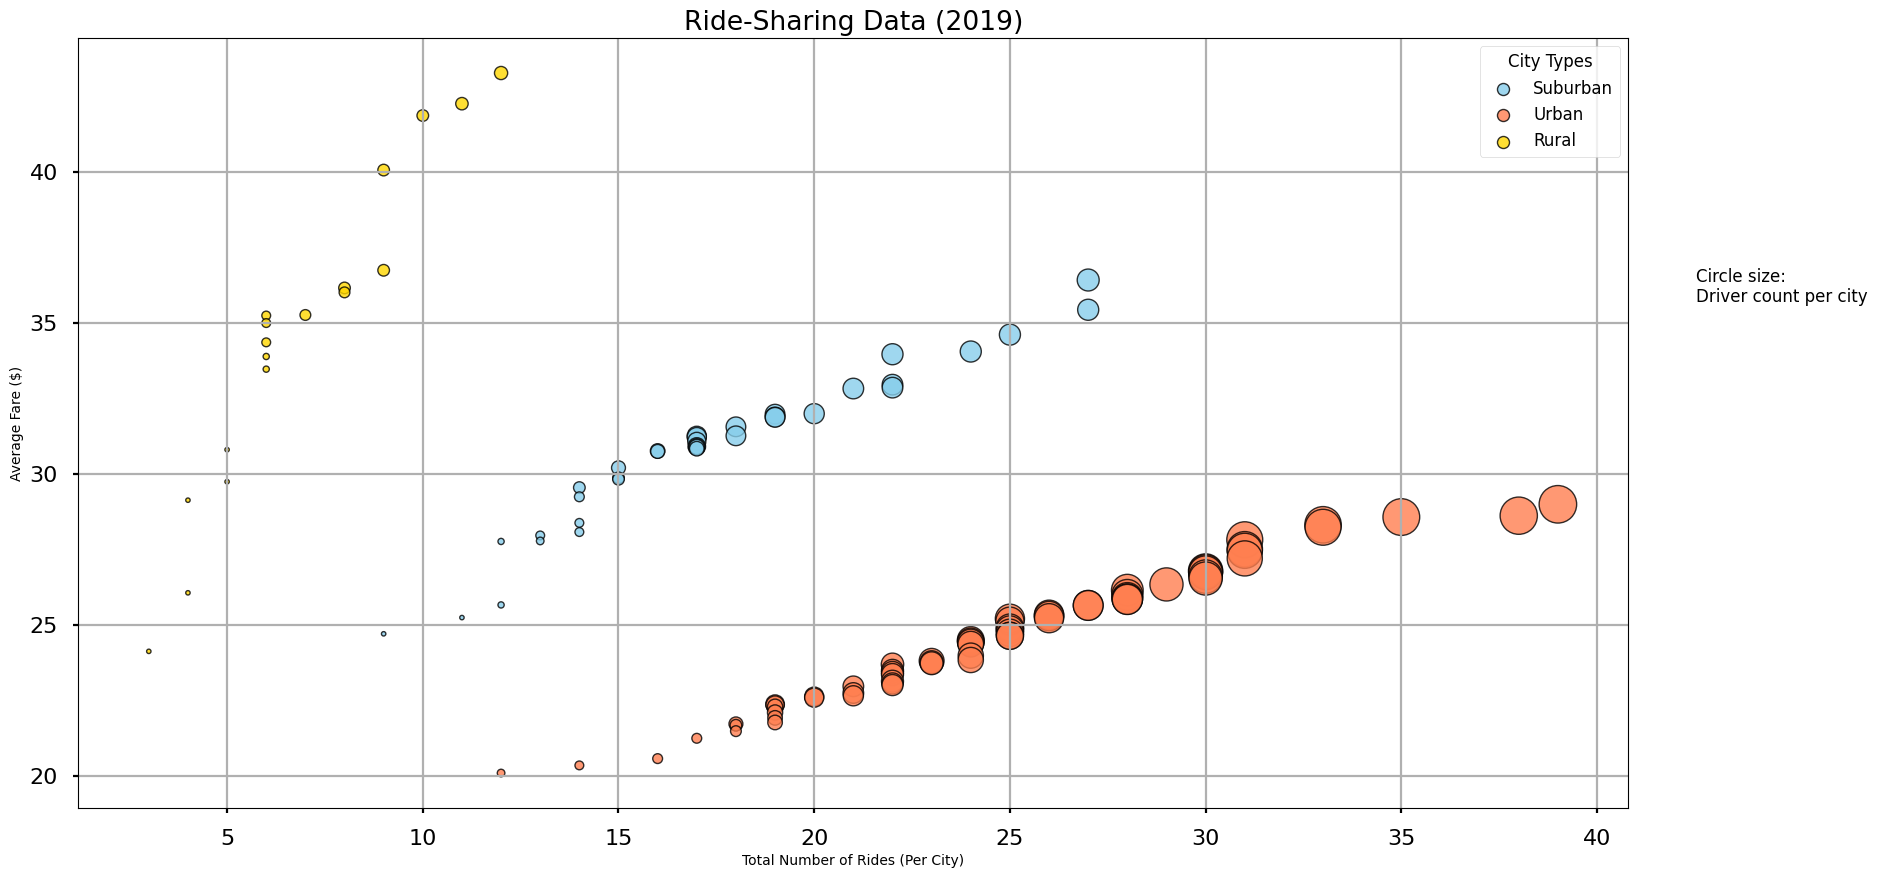

In [9]:
# Create a bubble chart that showcases the average fare versus the total number of rides
# with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
# build the suburban scatter plot

#style the plot
plt.style.use('seaborn-poster')

# Build the scatter plots for each city types.
fig, ax = plt.subplots(figsize=(20, 10))
# Build the Suburban scatter plot.
ax.scatter(suburban_ride_total,suburban_fare_mean, s=suburban_driver_mean*10, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
# Build the Urban scatter plot.
ax.scatter(urban_ride_total, urban_fare_mean, s=urban_driver_mean*10, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")
# Build the Rural scatter plot.
ax.scatter(rural_ride_total, rural_fare_mean, s=rural_driver_mean*10, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

# Incorporate the other graph properties
ax.set_title("Ride-Sharing Data (2019)")
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.grid(True)

# Create a legend
lgnd = ax.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
# Adjust the legend
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size under the legend.
chart_text = '''
    Circle size:
    Driver count per city
'''
ax.text(42, 35, chart_text, fontsize="12", wrap=False)

# Adjust the layout to include space for the text
plt.subplots_adjust(right=.9)

# Save the figure.
# plt.savefig("analysis/ride_by_avg_fare.png")

#### Ride Count Data

In [10]:
display(urban_cities_df.describe(),suburban_cities_df.describe(),rural_cities_df.describe())

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [11]:
# Calclulate the measures of central tendency for the ride count for each city type.

# Urban central tendency
mean_urban_ride = np.mean(urban_ride_total)
median_urban_ride = np.median(urban_ride_total)
mode_urban_ride = sts.mode(urban_ride_total)

# Suburban central tendency
mean_suburban_ride = np.mean(suburban_ride_total)
median_suburban_ride = np.median(suburban_ride_total)
mode_suburban_ride = sts.mode(suburban_ride_total)

# Rural central tendency
mean_rural_ride = np.mean(rural_ride_total)
median_rural_ride = np.median(rural_ride_total)
mode_rural_ride = sts.mode(rural_ride_total)


In [12]:
# Calclulate the measures of central tendency for the average fare for each city type.

# Get fare data for each city type
urban_fare = urban_cities_df["fare"]
suburban_fare = suburban_cities_df["fare"]
rural_fare = rural_cities_df["fare"]

# Urban central tendency
mean_urban_fare = np.mean(urban_fare)
median_urban_fare = np.median(urban_fare)
mode_urban_fare = sts.mode(urban_fare)

# Suburban central tendency
mean_suburban_fare = np.mean(suburban_fare)
median_suburban_fare = np.median(suburban_fare)
mode_suburban_fare = sts.mode(suburban_fare)

# Rural central tendency
mean_rural_fare = np.mean(rural_fare)
median_rural_fare = np.median(rural_fare)
mode_rural_fare = sts.mode(rural_fare)



In [13]:
# Calclulate the measures of central tendency for the driver count for each city type.

# Get driver count data for each city type
urban_driver = urban_cities_df["driver_count"]
suburban_driver = suburban_cities_df["driver_count"]
rural_driver = rural_cities_df["driver_count"]

# Urban central tendency
mean_urban_driver = np.mean(urban_driver)
median_urban_driver = np.median(urban_driver)
mode_urban_driver = sts.mode(urban_driver)

# Suburban central tendency
mean_suburban_driver = np.mean(suburban_driver)
median_suburban_driver = np.median(suburban_driver)
mode_suburban_driver = sts.mode(suburban_driver)

# Rural central tendency
mean_rural_driver = np.mean(rural_driver)
median_rural_driver = np.median(rural_driver)
mode_rural_driver = sts.mode(rural_driver)

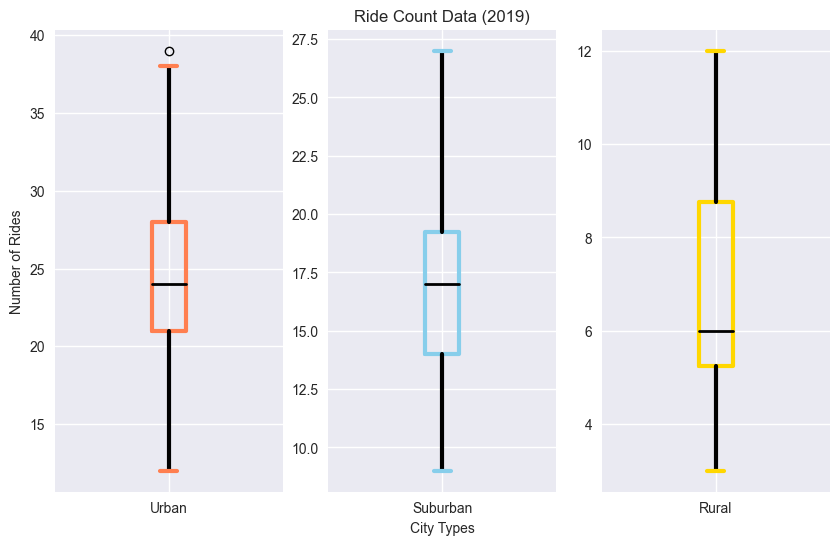

In [14]:
# Create a box-and-whisker plot

# create and style the plot
plt.style.use('seaborn')
fig, axes = plt.subplots(1,3,figsize=(10, 6))

# gather/prep the data
ride_count_totals = [urban_ride_total, suburban_ride_total, rural_ride_total]
x_labels = ["Urban", "Suburban", "Rural"]
colors = ["coral", "skyblue", "gold"]

# Build the boxplot for the urban cities ride count. = 
for i, ax in enumerate(axes):
    ax.boxplot(ride_count_totals[i], labels=[x_labels[i]], boxprops=dict(linewidth=3, color=colors[i]), medianprops=dict(linewidth=2, color="black"), whiskerprops=dict(linewidth=3, color="black"), capprops=dict(linewidth=3, color=colors[i]))



# Add the title, y-axis label and grid.
axes[1].set_title('Ride Count Data (2019)')
axes[0].set_ylabel('Number of Rides')
axes[1].set_xlabel('City Types')
# Save the figure.
# plt.savefig("analysis/ride_count_boxplot.png")
plt.show()

#### Fare, Driver and Ride Count percentages

In [15]:
# Gather and calculate the fare data

# get the sum of the fares for each city type
city_type_fares = rideshare_df.groupby(["type"]).sum()["fare"].sort_values(ascending=False)
# get a sum of all the fares
total_fares = rideshare_df["fare"].sum()
# calculate the percentage of the total fares for each city type
fare_percentages = 100 * city_type_fares / total_fares



In [16]:
# Gather and calculate the ride data

# get the sum of the rides for each city type
city_type_rides = rideshare_df.groupby(["type"]).count()["ride_id"].sort_values(ascending=False)
# get a sum of all the rides
total_rides = rideshare_df["ride_id"].count()
# calculate the percentage of the total rides for each city type
ride_percentages = 100 * city_type_rides / total_rides


In [17]:
# Gather and calculate the driver data

# get the sum of the drivers for each city type
city_type_driver = city_data_df.groupby(["type"]).sum()["driver_count"].sort_values(ascending=False)
# get a sum of all the drivers
total_drivers = city_data_df["driver_count"].sum()
# calculate the percentage of the total drivers for each city type
driver_percentages = 100 * city_type_driver / total_drivers

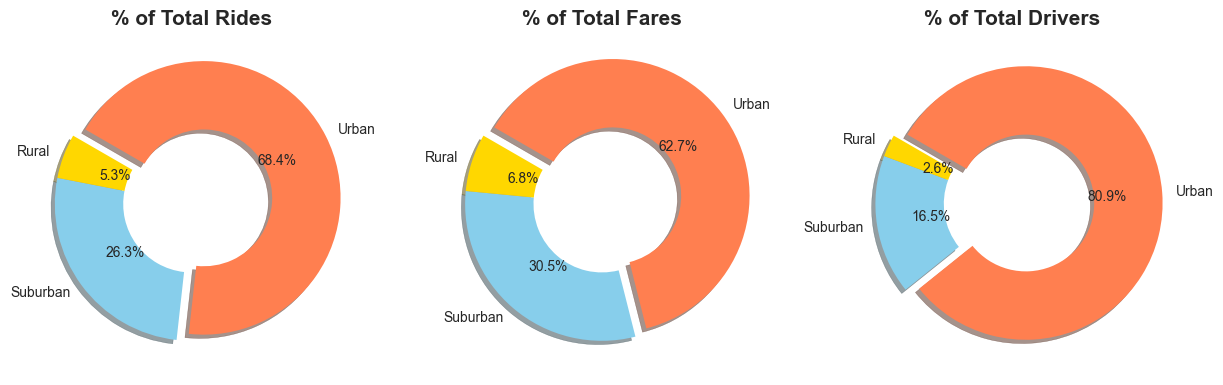

In [23]:
# Build the percentages city type pie chart.

fig, axes = plt.subplots(ncols=3,figsize=(15, 8))

percentage_data = [ride_percentages, fare_percentages, driver_percentages]
labels = ["Ride", "Fare", "Driver"]

for i, ax in enumerate(axes):
    ax.pie(
        percentage_data[i], 
        labels=x_labels,    
        colors=colors, 
        explode=[0.1, 0, 0], 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=150, 
        counterclock=False,
        wedgeprops=dict(width=0.5),
    )
    ax.set_title(f"% of Total {labels[i]}s", fontsize=15,fontweight="bold",wrap=True)


# Save the figure.
# plt.savefig("analysis/city_type_percentages.png")


#### City Type Summary

In [20]:
# Get the total number of rides for each city type
rides = rideshare_df.groupby(["type"]).count()["ride_id"].sort_values(ascending=False)

# Get the total drivers for each city type
drivers = city_data_df.groupby(["type"]).sum()["driver_count"].sort_values(ascending=False)

# Get the total fares for each city type
fares = rideshare_df.groupby(["type"]).sum()["fare"].sort_values(ascending=False)

# Get the average fare per ride for each city type
mean_ride_fare = fares / rides

# Get the average fare per driver for each city type
mean_driver_fare = fares / drivers


In [21]:
# Create a summary DataFrame

rideshare_summary = pd.concat(
    [rides, drivers, fares, mean_ride_fare, mean_driver_fare],
    axis=1
    )
rideshare_summary = rideshare_summary.rename(
    columns={
        'ride_id':'Total Rides',
        'driver_count':'Total Drivers',
        'fare':'Total Fare',
        0:"Avg Fare per Ride",
        1:'Avg Fare per Driver'
        }
    )
rideshare_summary.index.name = None

rideshare_summary

,Total Rides,Total Drivers,Total Fare,Avg Fare per Ride,Avg Fare per Driver
Urban,1625,2405,39854.38,24.525772,16.571468
Suburban,625,490,19356.33,30.970128,39.502714
Rural,125,78,4327.93,34.623440,55.486282


In [22]:
# Format the summary DataFrame

# total rides
rideshare_summary["Total Rides"] = rideshare_summary["Total Rides"].map("{:,}".format)

# Total Drivers
rideshare_summary["Total Drivers"] = rideshare_summary["Total Drivers"].map("{:,}".format)

# Total Fares
rideshare_summary["Total Fare"] = rideshare_summary["Total Fare"].map("${:,.2f}".format)

# Avg Fare per Ride
rideshare_summary["Avg Fare per Ride"] = rideshare_summary["Avg Fare per Ride"].map("${:,.2f}".format)

# Avg Fare per Driver
rideshare_summary["Avg Fare per Driver"] = rideshare_summary["Avg Fare per Driver"].map("${:,.2f}".format)

rideshare_summary

,Total Rides,Total Drivers,Total Fare,Avg Fare per Ride,Avg Fare per Driver
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57
Suburban,625,490,"$19,356.33",$30.97,$39.50
Rural,125,78,"$4,327.93",$34.62,$55.49


#### Dates and City Type fares

In [23]:
# Create a new Dataframe for the fare data by date and city type

# Gather data
rideshare_fare_date = rideshare_df.groupby(["date", "type"]).sum()[["fare"]]

# Format the dataframe

# reset the index
rideshare_fare_date = rideshare_fare_date.reset_index()
# set the index to the date column
rideshare_fare_date = rideshare_fare_date.pivot(index='date',columns='type',values='fare')
# select only Q1 2019
rideshare_fare_date = rideshare_fare_date.loc['2019-01-01':'2019-04-28']
# set the index to a datetime data type
rideshare_fare_date.index = pd.to_datetime(rideshare_fare_date.index)
# order the columns
rideshare_fare_date = rideshare_fare_date[x_labels]

# Resample the dataframe by Week
rideshare_fare_date = rideshare_fare_date.resample('W').sum()

rideshare_fare_date

type,Urban,Suburban,Rural
date,,,
2019-01-06,1661.68,721.60,187.92
2019-01-13,2050.43,1105.13,67.65
2019-01-20,1939.02,1218.20,306.00
2019-01-27,2129.51,1203.28,179.69
2019-02-03,2086.94,1042.79,333.08
2019-02-10,2162.64,974.34,115.80
2019-02-17,2235.07,1045.50,95.82
2019-02-24,2466.29,1412.74,419.06
2019-03-03,2218.20,858.46,175.14


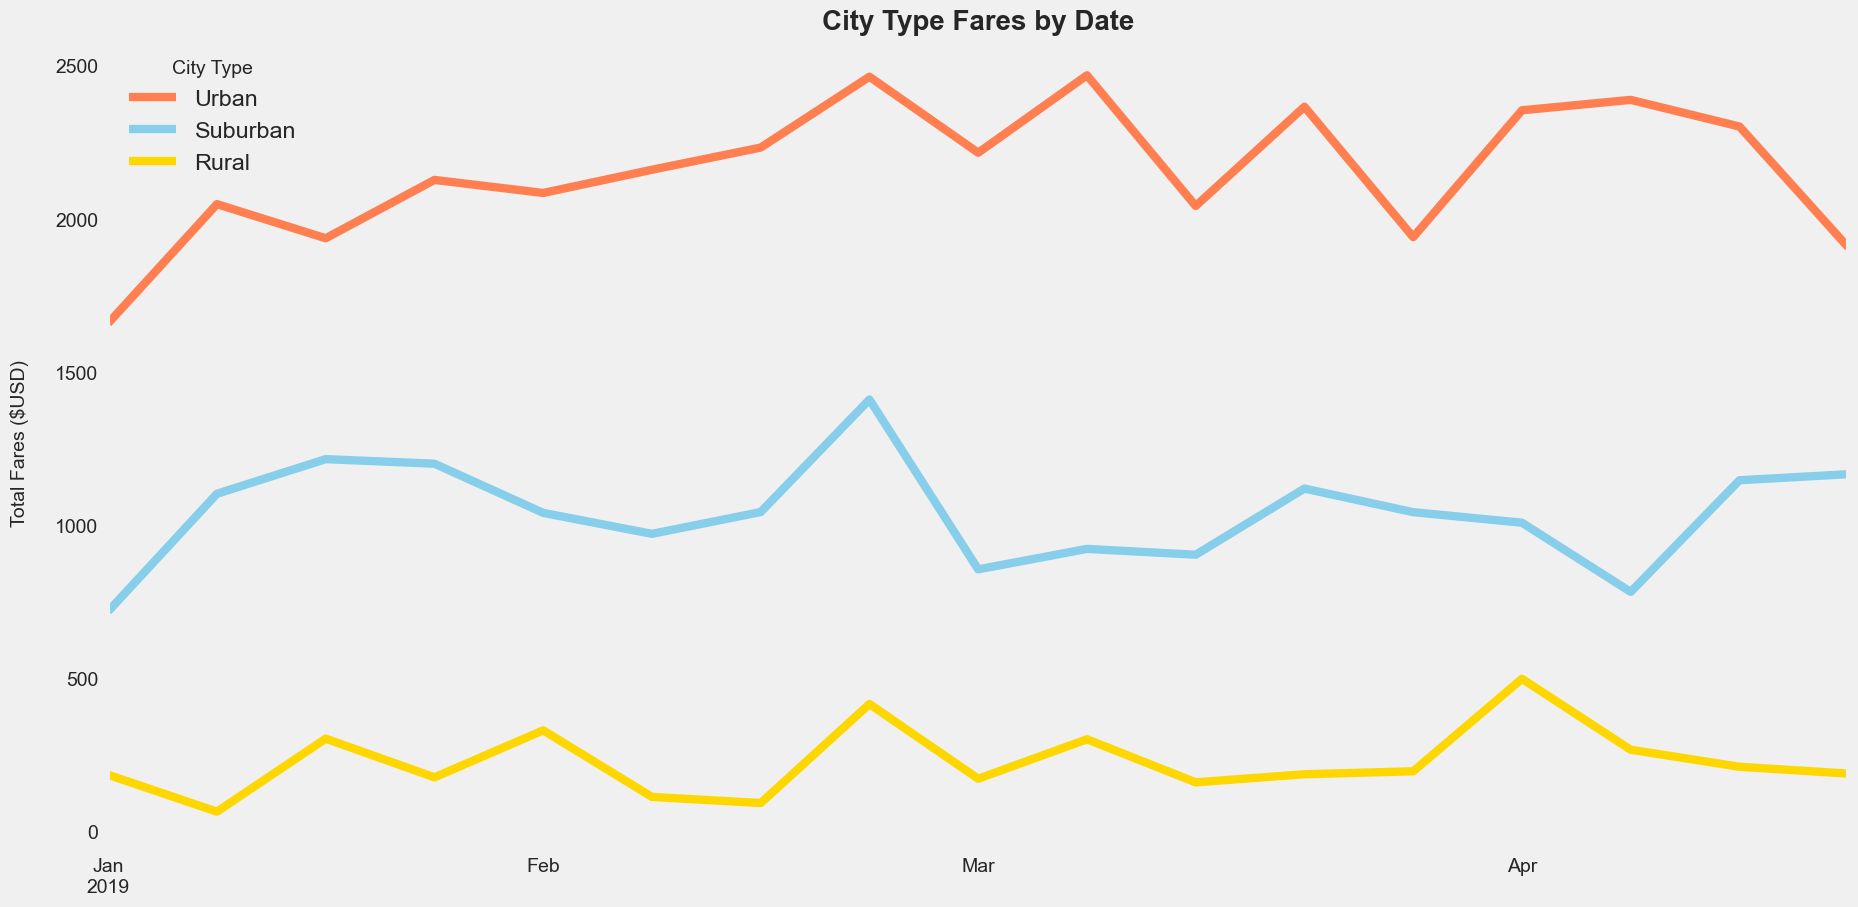

In [24]:
# Create a line chart for the fare data by date and city type
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20, 10))
rideshare_fare_date.plot(
    kind='line',
    ax=ax,
    color=colors,
    linewidth=6,
    fontsize=14
    )
# set plot labels
ax.set_xlabel('')
ax.set_ylabel('Total Fares ($USD)\n')
ax.set_title('City Type Fares by Date',fontsize=20,fontweight='bold')
ax.legend(loc='upper left',shadow=True,fontsize='large',title='City Type')
ax.grid(False)

# Save the figure.
# plt.savefig('analysis/city_type_fares_by_date.png')